# **Linear Regression Implementation from Scratch**

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

# **Generating Data Sets**


*   Randomly generate $\mathbf{X}\in\mathbb{R}^{1000\times 2}$
*   Use ground truth: weight $\mathbf{w}=[2,-3.4]^T$ and bias $b=4.2$.
*   Generate label by $\mathbf{y} = \mathbf{X} \mathbf{w} +b +\epsilon$ with noise $\epsilon$ obeying a normal distribution with a mean of 0 and a standard deviation of 0.01.



In [2]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.normal(0, 1, size=(num_examples, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.normal(0, 0.01, size=(labels.shape))

# **Visualize the Second Feature and Label**

torch.Size([1000, 2]) torch.Size([1000])


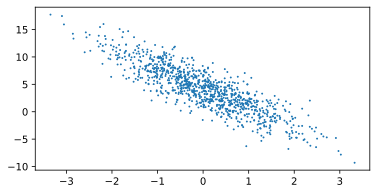

In [3]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(6, 3))
print(features.shape, labels.shape)
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

# **Reading Data**

Iterate over the data set and return batch_size (batch size) random examples every time.

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j,:], labels[j]

# **Print a Small Data Batch**

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.0707,  0.0135],
        [ 0.1714, -0.3840],
        [-0.1072, -1.0227],
        [ 0.8618, -0.4257],
        [-1.0963, -0.3109],
        [ 1.6692, -0.7007],
        [-1.1809, -1.5101],
        [-0.1258, -0.4564],
        [ 0.2030, -1.9810],
        [-0.6831,  0.9610]]) tensor([ 4.2843,  5.8626,  7.4654,  7.3709,  3.0648,  9.9260,  6.9754,  5.5069,
        11.3302, -0.4314])


# **Initialize Model Parameters**
Weights are initialized to normal random numbers using a mean of 0 and a standard deviation of 0.01, with the bias $b$ set to zero.

In [6]:
w = torch.normal(0, 0.01, size=(num_inputs, 1))
b = torch.zeros(size=(1,))

# **Attach Gradients to Parameters**

In [7]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

# **Define the Liner Model**

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

# **Define the Loss Function**

In [9]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# **Define the Optimization Algorithm**

In [10]:
def sgd(params, lr, batch_size):
    for param in params:
        # param[:] = param - lr * param.grad / batch_size
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

# **Training**

In [11]:
lr = 0.1 # Learning rate
num_epochs = 3 # Number of iterations
net = linreg # Our fancy linear model
loss = squared_loss # 0.5 (y-y')^2
w = torch.normal(0, 0.01, size=(num_inputs, 1))
b = torch.zeros(size=(1,))
w.requires_grad_(True)
b.requires_grad_(True)
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with torch.enable_grad():
            l = loss(net(X, w, b), y) # Minibatch loss in X and y
        l.mean().backward() # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 2.115587
epoch 2, loss 0.263004
epoch 3, loss 0.033059


# **Evaluate the Trained Model**

In [12]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w tensor([ 0.0675, -0.1273], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.2090], grad_fn=<RsubBackward1>)
tensor([[ 1.9325],
        [-3.2727]], requires_grad=True)
tensor([3.9910], requires_grad=True)
